In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("diabetic_data_2.csv")
df = pd.DataFrame(data)
print(df.shape)
df

(91842, 90)


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
0,15,3,59,0,18,0,0,0,276.00,250.01,...,1,0,0,0,0,0,0,0,0,0
1,35,2,44,1,16,0,0,0,8.00,250.43,...,1,0,0,0,0,0,0,0,0,0
2,45,1,51,0,8,0,0,0,197.00,157.00,...,1,0,0,0,0,0,0,0,0,0
3,55,3,31,6,16,0,0,0,414.00,411.00,...,0,0,0,0,0,0,0,0,0,0
4,75,5,73,0,12,0,0,0,428.00,492.00,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91837,75,3,51,0,16,0,0,0,250.13,291.00,...,1,0,0,0,0,0,0,0,0,0
91838,85,5,33,3,18,0,0,1,560.00,276.00,...,0,0,0,0,0,0,0,0,0,0
91839,75,1,53,0,9,1,0,0,38.00,590.00,...,1,0,0,0,0,0,0,0,0,0
91840,85,10,45,2,21,0,0,1,996.00,285.00,...,1,0,0,0,0,0,0,0,0,0


In [3]:
X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.3229724507259979
              precision    recall  f1-score   support

           0       0.58      0.93      0.71     16234
           1       0.72      0.21      0.32     14074

    accuracy                           0.60     30308
   macro avg       0.65      0.57      0.52     30308
weighted avg       0.64      0.60      0.53     30308



# Tentativa 1
### Normalização dos dados

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)

model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.5367586125251569
              precision    recall  f1-score   support

           0       0.62      0.72      0.67     16234
           1       0.60      0.48      0.54     14074

    accuracy                           0.61     30308
   macro avg       0.61      0.60      0.60     30308
weighted avg       0.61      0.61      0.61     30308



# Tentativa 2

### PCA - sem normalizar

n_components 89: 0.510379
n_components 79: 0.585480
n_components 69: 0.575024
n_components 60: 0.574961
n_components 50: 0.607056
n_components 40: 0.514572
n_components 31: 0.595669
n_components 21: 0.545050
n_components 11: 0.524310
n_components 2: 0.624903


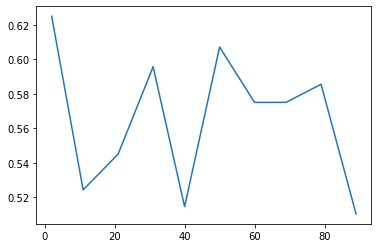

In [25]:
results = dict()
pca_components = [int(i) for i in np.linspace(89, 2, 10)]
for n in pca_components:
    pca = PCA(n_components=n)
    X_r = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.33, random_state=42)
    model = MLPClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    results[n] = f1
    print("n_components %i: %f" % (n, f1))

plt.plot(list(results.keys()), list(results.values()))

### PCA - dados normalizados

n_components 89: 0.575946
n_components 79: 0.585071
n_components 69: 0.585704
n_components 60: 0.553105
n_components 50: 0.595733
n_components 40: 0.587485
n_components 31: 0.582152
n_components 21: 0.558828
n_components 11: 0.535059
n_components 2: 0.483946


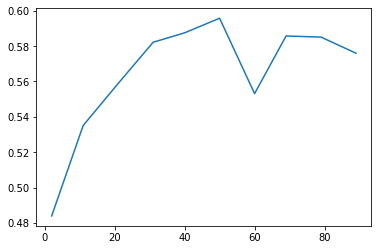

In [29]:
results = dict()
pca_components = [int(i) for i in np.linspace(89, 2, 10)]
for n in pca_components:
    pca = PCA(n_components=n)
    X_r = pca.fit_transform(X_s)
    
    X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.33, random_state=42)
    model = MLPClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    results[n] = f1
    print("n_components %i: %f" % (n, f1))

plt.plot(list(results.keys()), list(results.values()))

# Tentativa 3

### Gridsearch

In [34]:
model = MLPClassifier()
parameters = {
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "learning_rate_init": [0.001, 0.05]
}
clf = GridSearchCV(model, parameters, cv=3, scoring="f1")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'activation': 'tanh', 'learning_rate_init': 0.001, 'solver': 'adam'}


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier(activation="tanh",
                     solver="adam",
                     learning_rate_init=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.5272393048128342
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     16234
           1       0.64      0.45      0.53     14074

    accuracy                           0.63     30308
   macro avg       0.63      0.61      0.61     30308
weighted avg       0.63      0.63      0.62     30308



# Tentativa 4

### Multi-layers

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier([500, 500])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.5937499999999999
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     16234
           1       0.60      0.58      0.59     14074

    accuracy                           0.63     30308
   macro avg       0.63      0.63      0.63     30308
weighted avg       0.63      0.63      0.63     30308



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)

model = MLPClassifier([500, 500])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.5432107572136818
              precision    recall  f1-score   support

           0       0.60      0.61      0.61     16234
           1       0.55      0.54      0.54     14074

    accuracy                           0.58     30308
   macro avg       0.58      0.58      0.58     30308
weighted avg       0.58      0.58      0.58     30308



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier([1000, 1000, 1000])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.583336439888164
              precision    recall  f1-score   support

           0       0.64      0.70      0.67     16234
           1       0.61      0.56      0.58     14074

    accuracy                           0.63     30308
   macro avg       0.63      0.63      0.63     30308
weighted avg       0.63      0.63      0.63     30308



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)

model = MLPClassifier([1000, 1000, 1000])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.5469543147208122
              precision    recall  f1-score   support

           0       0.61      0.60      0.60     16234
           1       0.54      0.55      0.55     14074

    accuracy                           0.58     30308
   macro avg       0.57      0.57      0.57     30308
weighted avg       0.58      0.58      0.58     30308



# Tentativa 5

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier(hidden_layer_sizes=[500, 500],
                     activation="tanh",
                     solver="adam",
                     learning_rate_init=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1-score average:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1-score average: 0.6117213618066453
              precision    recall  f1-score   support

           0       0.66      0.61      0.64     16234
           1       0.59      0.64      0.61     14074

    accuracy                           0.62     30308
   macro avg       0.62      0.63      0.62     30308
weighted avg       0.63      0.62      0.62     30308



n_components 89: 0.539890
n_components 79: 0.537057
n_components 69: 0.534546
n_components 60: 0.537787
n_components 50: 0.538142
n_components 40: 0.535523
n_components 31: 0.525084
n_components 21: 0.523296
n_components 11: 0.516342
n_components 2: 0.069290


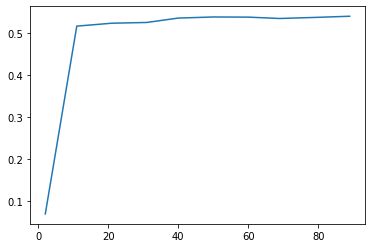

In [6]:
results = dict()
pca_components = [int(i) for i in np.linspace(89, 2, 10)]
for n in pca_components:
    pca = PCA(n_components=n)
    X_r = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.33, random_state=42)
    model = MLPClassifier(hidden_layer_sizes=[500, 500],
                     activation="tanh",
                     solver="adam",
                     learning_rate_init=0.001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    results[n] = f1
    print("n_components %i: %f" % (n, f1))

plt.plot(list(results.keys()), list(results.values()))

# Conclusão